# Chapter 5 - Power, Effect Size, P-Values, and Estimating Required Sample Size

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy as sp
from scipy import stats

### Understanding Effect Size (Cohen's $d = 0.8$)

Effect size is a standardized measure of the strength of the relationship between two variables or the magnitude of a difference between groups. It provides a way to understand the practical significance of results, regardless of sample size.

---

#### What is Cohen's $d$?

Cohen's \(d\) is a common effect size measure used for comparing the means of two groups. It quantifies the difference between group means in terms of **standard deviations**.

The formula for Cohen's \(d\) is:

$$
d = \frac{\mu_1 - \mu_2}{\sigma}
$$

Where:
- $ \mu_1, \mu_2 $: The means of the two groups.
- $ \sigma $: The pooled standard deviation of the two groups.

---

#### Interpreting Cohen's \(d\)

Cohen (1988) proposed the following guidelines for interpreting the magnitude of \(d\):
- $ d = 0.2 $: **Small effect** – The difference between groups is noticeable but small.
- $ d = 0.5 $: **Medium effect** – A moderate difference that is visible to the observer.
- $ d = 0.8 $: **Large effect** – A substantial and meaningful difference between groups.

For $ d = 0.8 $, the difference between group means is **0.8 standard deviations**, meaning the groups are well-separated and the effect is strong.

### Comparing Effectiveness of Two Teaching Methods

A school wants to determine whether Teaching Method A and Teaching Method B differ significantly in their impact on students' math test scores. They plan to conduct an experiment and need to calculate the required sample size for each group to detect a meaningful difference in test scores with adequate statistical power.

#### Scenario Details:

       Effect Size (Cohen's d): 0.8 (a large effect size, assuming the difference between means is significant relative to variability).
    Significance Level (Alpha): 0.05 (the probability of rejecting the null hypothesis when it is true, a 5% Type I error rate).
             Statistical Power: 0.8 (80% probability of detecting the effect if it exists, a 20% chance of Type II error).
             Sample Size Ratio: 1.0 (equal sample sizes for both groups).
  
The school uses the `TTestIndPower` class from the statsmodels library to calculate the minimum sample size required per group.

In [5]:
from statsmodels.stats.power import TTestIndPower

# Parameters for the power analysis
effect = 0.8         # Effect size (Cohen's d)
alpha = 0.05         # Significance level
power = 0.8          # Desired statistical power (1 - Type II error rate)

# Initialize the T-test power analysis object
analysis = TTestIndPower()

# Solve for the required sample size
result = analysis.solve_power(
    effect,           # Effect size
    power=power,      # Desired power
    nobs1=None,       # Sample size per group (to be calculated)
    ratio=1.0,        # Ratio of sample sizes between the two groups
    alpha=alpha       # Significance level
)

# Print the calculated sample size
print('Sample Size per Group: %.3f' % result)

Sample Size per Group: 25.525


    The required number of participants in each group ~26 participants per group if effect size is 0.8.

#### Power Setting:

Blood pressure control is critical for preventing heart disease and stroke. Missing a real effect (false negative) could prevent an effective treatment from reaching patients.

The researchers set power = 0.9 to ensure a 90% probability of detecting a true effect, meaning:

* If the medication actually works, there is a 90% chance of detecting the difference in blood pressure reduction between the two groups.
* This minimizes the risk of Type II error (failing to detect the medication's effect if it exists).

In [8]:
# Parameters for the power analysis
effect = 0.8         # Effect size (Cohen's d)
alpha = 0.05         # Significance level
power = 0.9          # Desired statistical power (1 - Type II error rate)

# Initialize the T-test power analysis object
analysis = TTestIndPower()

# Solve for the required sample size
result = analysis.solve_power(
    effect,           # Effect size
    power=power,      # Desired power
    nobs1=None,       # Sample size per group (to be calculated)
    ratio=1.0,        # Ratio of sample sizes between the two groups
    alpha=alpha       # Significance level
)

# Print the calculated sample size
print('Sample Size per Group: %.3f' % result)

Sample Size per Group: 33.826


We can see that as our demand for power increases, this is associated with a likewise
increase in sample size. In English, what this means is that if you want more of a
chance to reject the null, that is, greater sensitivity, you are going to need to collect
more subjects.

### Demonstrating the Influence of Effect Size

In [11]:
# Parameters for the power analysis
effect = 0.2         # Effect size (Cohen's d)
alpha = 0.05         # Significance level
power = 0.8          # Desired statistical power (1 - Type II error rate)

# Initialize the T-test power analysis object
analysis = TTestIndPower()

# Solve for the required sample size
result = analysis.solve_power(
    effect,           # Effect size
    power=power,      # Desired power
    nobs1=None,       # Sample size per group (to be calculated)
    ratio=1.0,        # Ratio of sample sizes between the two groups
    alpha=alpha       # Significance level
)

# Print the calculated sample size
print('Sample Size per Group: %.3f' % result)

Sample Size per Group: 393.406


A drop in effect size from 0.8 to 0.2 implies that we are attempting to detect something that is much smaller than before. We need
a more powerful test to detect the smaller effect than the large. 

### The Influence of Significance Levels on Statistical Power

In [14]:
# Parameters for the power analysis
effect = 0.8         # Effect size (Cohen's d)
alpha = 0.2         # Significance level
power = 0.8          # Desired statistical power (1 - Type II error rate)

# Initialize the T-test power analysis object
analysis = TTestIndPower()

# Solve for the required sample size
result = analysis.solve_power(
    effect,           # Effect size
    power=power,      # Desired power
    nobs1=None,       # Sample size per group (to be calculated)
    ratio=1.0,        # Ratio of sample sizes between the two groups
    alpha=alpha       # Significance level
)

# Print the calculated sample size
print('Sample Size per Group: %.3f' % result)

Sample Size per Group: 14.515


We can see that keeping other parameters the same as in our earlier example (where
we estimated the number of subjects to equal approximately 25 per group), but adjusting the significance level from 0.05 to 0.20, the required sample size is now only 14 or
so, down from 25.

# Chapter 6 - Analysis of Variance (ANOVA)

### Example: Four different teachers and their grades

In [18]:
ac = [70, 67, 65, 75, 76, 73, 69, 68, 70, 76, 77, 75, 85, 86, 85, 76, 75, 73, 95, 94, 89, 94, 93, 91]
teach = [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4]

data = {'ac' : ac,
     'teach' : teach}

df = pd.DataFrame(data)
df.head()

,ac,teach
0,70,1
1,67,1
2,65,1
3,75,1
4,76,1


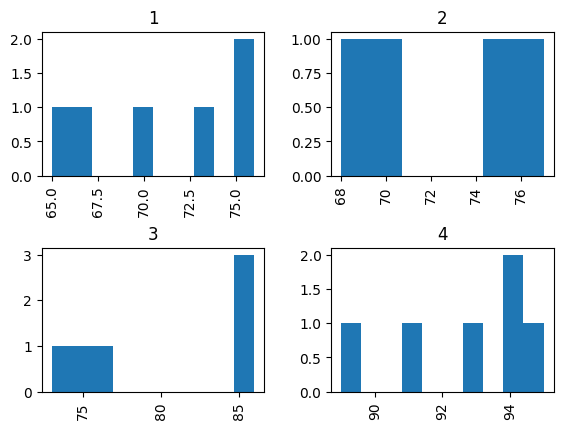

In [19]:
df['ac'].hist(by=df['teach']);

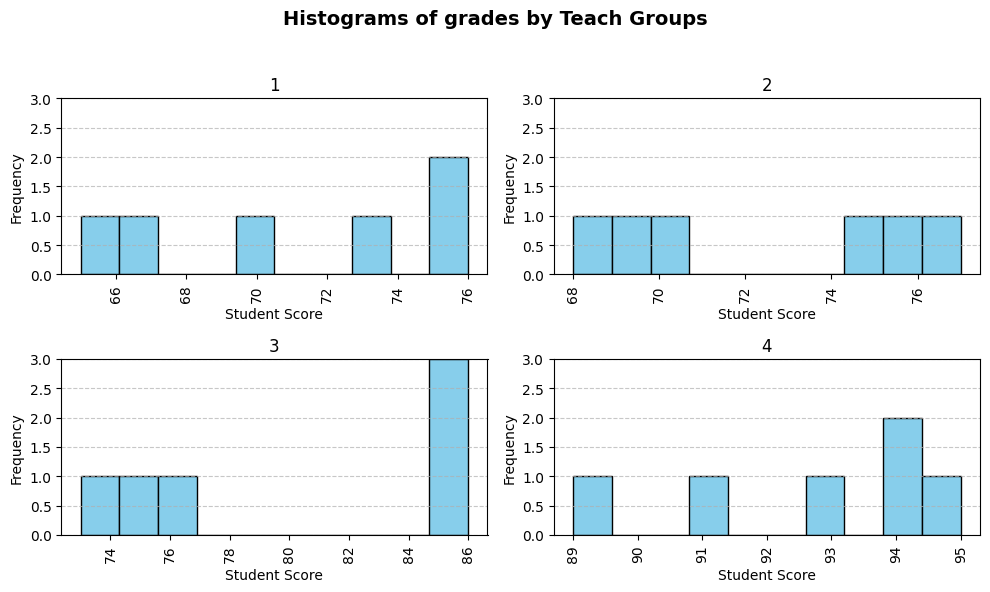

In [20]:
# Create histograms for the 'ac' column grouped by the unique values in the 'teach' column
hist_axes = df['ac'].hist(                          # Create a histogram for the 'ac' column
            by=df['teach'],                         # Group the histograms by the unique values in the 'teach' column
            figsize=(10, 6),                        # Set the overall size of the figure for better readability
            color='skyblue',                        # Set a custom color for the bars in the histograms
            edgecolor='black',                      # Add black edges to the bars for better visual definition
            grid=False                              # Disable grid lines to make the histograms cleaner
)

# Customize each subplot
for ax in hist_axes.flatten():                      # Iterate through all the subplot axes
    ax.set_ylim(0, 3)                               # Set the y-axis limit to range from 0 to 3
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)  # Add dashed horizontal grid lines
    ax.xaxis.grid(False)                            # Disable vertical grid lines
    ax.set_ylabel('Frequency')                      # Add y-axis label to each subplot (optional)
    ax.set_xlabel('Student Score')                  # Add x-axis label to each subplot (optional)

# Set the overall title for the grouped histograms
plt.suptitle('Histograms of grades by Teach Groups', fontsize=14, fontweight='bold')

# Adjust the layout to prevent overlap between the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plot
plt.show()

In [21]:
df['ac'].sum()

1897

In [22]:
df['ac'].mean()

79.04166666666667

In [23]:
df['ac'].median()

76.0

In [24]:
df['ac'].std()

9.64806430987772

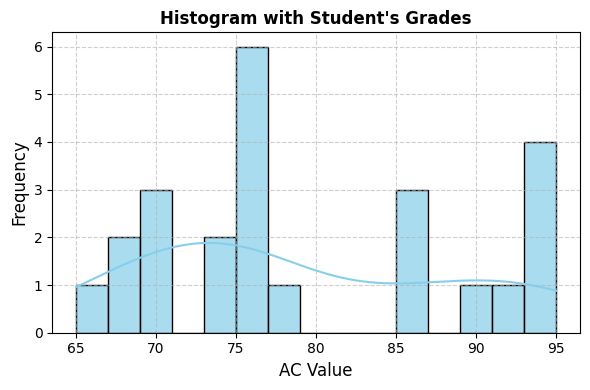

In [25]:
# Create a histogram for the 'ac' column with KDE using Seaborn
plt.figure(figsize=(6, 4))      # Set the figure size

# Plot the histogram with KDE
sns.histplot(
    data=df,                    # Data source
    x='ac',                     # Column to visualize
    bins=15,                    # Number of bins for grouping data
    kde=True,                   # Add Kernel Density Estimate
    color='skyblue',            # Bar color
    edgecolor='black',          # Black edges for bars
    alpha=0.7                   # Transparency for the bars
)

# Add labels and title
plt.title("Histogram with Student's Grades", fontsize=12, fontweight='bold')   # Title of the plot
plt.xlabel('AC Value', fontsize=12)                                            # Label for the x-axis
plt.ylabel('Frequency', fontsize=12)                                           # Label for the y-axis

plt.grid(visible=True, linestyle='--', alpha=0.6)                              # Dashed gridlines

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

In [26]:
df['ac'].describe()

count    24.000000
mean     79.041667
std       9.648064
min      65.000000
25%      72.250000
50%      76.000000
75%      86.750000
max      95.000000
Name: ac, dtype: float64

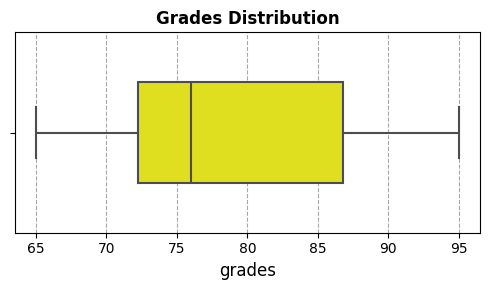

In [27]:
# Create a horizontal box plot for the 'ac' column
plt.figure(figsize=(5, 3))    # Set the figure size

sns.boxplot(
    x=df['ac'],               # Set 'ac' values along the X-axis for a horizontal box plot
    color='yellow',           # Set the box color
    width=0.5,                # Adjust the width of the box
    fliersize=5,              # Size of the outliers
    linewidth=1.5             # Line width of the box edges
)

# Add labels and title
plt.title('Grades Distribution', fontsize=12, fontweight='bold')           # Title of the plot
plt.xlabel('grades', fontsize=12)                                          # Label for the x-axis

plt.grid(visible=True, axis='x', linestyle='--', color='gray', alpha=0.7)  # Add a vertical grid

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()

### Normality Test

| **Feature**         | **Shapiro-Wilk Test**           | **Anderson-Darling Test**        |
|----------------------|----------------------------------|-----------------------------------|
| **Sample Size**      | Small to medium (3–2000)        | Works well for large datasets     |
| **Focus**            | General normality test          | Focuses on tails of the distribution |
| **Use Case**         | Pre-check for parametric tests  | Testing fit to multiple distributions |
| **Sensitivity**      | Sensitive to outliers           | Less sensitive to outliers        |
| **Ease of Use**      | Simple p-value interpretation   | Critical value interpretation     |


### Shapiro-Wilk test

The Shapiro-Wilk test checks for normality in the data. A small p-value (typically ≤ 0.05) indicates the data significantly deviates from a normal distribution.

In [32]:
sp.stats.shapiro(ac)

ShapiroResult(statistic=0.9056544303894043, pvalue=0.028417615219950676)

In [33]:
# Perform the Shapiro-Wilk
shapiro_test = sp.stats.shapiro(ac)

# Print Results for Shapiro-Wilk Test
print(f"Statistic: {shapiro_test.statistic:.4f}")
print(f"  P-value: {shapiro_test.pvalue:.4e}")

Statistic: 0.9057
  P-value: 2.8418e-02


    p-value (0.028) < alpha (0.05); Ha: we can reject the assumption of normality and infer non-normality. 

### Levene’s Test – Testing Homoscedasticity
Levene’s test checks whether two or more groups have equal variances.

       Null Hypothesis (𝐻0): The variances of the groups are equal.
       Alternative Hypothesis (𝐻1): At least one group has a different variance.

In [36]:
# Perform Levene's test
tstat, p = sp.stats.levene(ac, teach)

# Print the results
print(f"Levene's Test Statistic = {tstat:.4f}, p-value = {p:.4f}")

Levene's Test Statistic = 26.3436, p-value = 0.0000


    p-value (0.000) < alpha (0.05); H1: At least one group has a different variance.

## ANOVA

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ac      24 non-null     int64
 1   teach   24 non-null     int64
dtypes: int64(2)
memory usage: 516.0 bytes


In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit an Ordinary Least Squares (OLS) regression model
model = ols('ac ~ C(teach)', data=df).fit()

In [41]:
# Perform an ANOVA (Analysis of Variance) on the model
table = sm.stats.anova_lm(model,     # Regression Model
                          typ=2)     # Partially Adjusted SS
table

,sum_sq,df,F,PR(>F)
C(teach),1764.125000,3.0,31.209642,9.677198e-08
Residual,376.833333,20.0,NaN,NaN


    p-value (0.000) < alpha (0.05); H1: we have evidence to reject the null hypothesis 
    and conclude that somewhere among the means there is a mean population difference.

### Tukey's Range Test

Tukey's Range Test, also known as **Tukey's Honestly Significant Difference (HSD) Test**, is a post-hoc analysis used after an ANOVA test to determine **which specific group means are significantly different** from each other.

#### When to Use Tukey’s Test:
1. **ANOVA indicates significant differences**:  
   Use Tukey’s test after rejecting the null hypothesis in an ANOVA test.
2. **Multiple group comparisons**:  
   When comparing the means of three or more groups to identify pairwise differences.

---

#### Hypotheses:
- **Null Hypothesis $( H_0 )$**:  
  The means of the two groups being compared are equal.  
 $
  \mu_i = \mu_j
$
- **Alternative Hypothesis $( H_1 )$**:  
  The means of the two groups are not equal.  
  $
  \mu_i \neq \mu_j
$

In [45]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's Honestly Significant Difference (HSD) test
tukey_test = pairwise_tukeyhsd(endog=df['ac'],       # Dependent variable
                                groups=df['teach'],  # Independent variable
                                alpha=0.05)          # Alpha
print(tukey_test)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2      1.5 0.9313 -5.5144  8.5144  False
     1      3      9.0 0.0091  1.9856 16.0144   True
     1      4  21.6667    0.0 14.6522 28.6811   True
     2      3      7.5 0.0334  0.4856 14.5144   True
     2      4  20.1667    0.0 13.1522 27.1811   True
     3      4  12.6667 0.0003  5.6522 19.6811   True
----------------------------------------------------


Significant Differences:

    1 vs. 3: Significant difference (𝑝 < 0.05); H1: Reject Null Hypothesis
    1 vs. 4: Significant difference (𝑝 < 0.05); H1: Reject Null Hypothesis
    2 vs. 3: Significant difference (𝑝 < 0.05); H1: Reject Null Hypothesis
    2 vs. 4: Significant difference (𝑝 < 0.05); H1: Reject Null Hypothesis
    3 vs. 4: Significant difference (𝑝 < 0.05); H1: Reject Null Hypothesis

No Significant Difference:

    1 vs. 2: No significant difference (𝑝 > 0.05); H0: Can not reject H0

General Conclusions:

    Strong Differences with Group 4: Group 4 has significantly different means compared to all other groups, with particularly large mean differences.

    Moderate Differences between Groups 2 and 3: Groups 2 and 3 show a smaller but significant difference in means.

    Similarity between Groups 1 and 2: Groups 1 and 2 do not exhibit a significant difference in their means.

### Factorial ANOVA

In [49]:
ac = [70, 67, 65, 75, 76, 73, 69, 68, 70, 76, 77, 75, 85, 86, 85, 76, 75, 73, 95, 94, 89, 94, 93, 91]
teach = [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4]
text = [1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2]

data2 = {'ac' : ac,
      'teach' : teach,
        'text': text}

df2 = pd.DataFrame(data2)
df2.head()

,ac,teach,text
0,70,1,1
1,67,1,1
2,65,1,1
3,75,1,2
4,76,1,2


In [50]:
# Create an OLS model with two categorical independent variables
model_2 = ols('ac ~ C(teach) + C(text)',  # Define the dependent variable ('ac') and independent variables ('teach' and 'text')
              data=df2                    # Use the data from the DataFrame 'df2'
             ).fit()                      # Fit the model to the data

# Perform ANOVA on the fitted model
table_2 = sm.stats.anova_lm(model_2,      # Pass the fitted model to the ANOVA function
                            typ=2         # Use Type II sum of squares for the ANOVA calculation
                           )

# Display the ANOVA table
table_2

,sum_sq,df,F,PR(>F)
C(teach),1764.125000,3.0,30.051216,2.029775e-07
C(text),5.041667,1.0,0.257649,6.175816e-01
Residual,371.791667,19.0,NaN,NaN


    Teach_p-value (0.000) < alpha (0.05); H1: we have evidence to reject the null hypothesis 
    and conclude that somewhere among the means there is a mean population difference.

    Text_p-value(0.618) > alpha (0.05); H0: wh can not reject the null hypothesis
    and we have evidence that all group means are equal.

In the **one-way model**, recall our F and corresponding
p-value came out to be 31.21 and 9.677198e-08, respectively. When we include the
text factor, the F-statistic now comes out to be 30.05 with the p-value 2.029775e-07.

The difference in F-statistic and p-value for C(teach) between the **one-way** and **two-way** ANOVA models is due to the inclusion of an additional factor (C(text)). While this factor explains a small amount of variability, it does not significantly alter the conclusions about the effect of C(teach).

### Modeling the Interaction Term

In [54]:
# Fit a two-way ANOVA model with an interaction term
model_3 = ols('ac ~ C(teach) + C(text) + C(teach)*C(text)',  # Specify the formula for the model
              data=df2                                       # Use the dataframe `df2`
             ).fit()                                         # Fit the model to the data

# Perform an ANOVA test on the fitted model
table_3 = sm.stats.anova_lm(model_3,  # Use the fitted model `model_3`
                            typ=2     # Use Type II sum of squares for the ANOVA
                           )

# Display the ANOVA table
table_3  

,sum_sq,df,F,PR(>F)
C(teach),1764.125000,3.0,180.935897,1.488709e-12
C(text),5.041667,1.0,1.551282,2.308781e-01
C(teach):C(text),319.791667,3.0,32.799145,4.574415e-07
Residual,52.000000,16.0,NaN,NaN


    C(teach)_p-value(0.000) < alpha (0.05); H1: mu's are not equal

    C(text)_p-value(0.231) > alpha (0.05); H0: mu's are equal

    C(teach):C(text)_p-value(000) < alpha (0.05); H1: mu's are not equal

It is pedagogical to compare the two-way ANOVA fit earlier, where no interaction was
modeled, to the two-way ANOVA we just fit with the interaction term. Notice that the
total sum of squares is the same in both cases:

    Main Effects Only: 1,764.125000 + 5.041667 + 371.791667 = 2,140.958334

    Interaction Model: 1,764.125000 + 5.041667 + 319.791667 + 52.000000 = 2,140.958334

When fitting the interaction term in ANOVA, some variance initially attributed to the residuals is reallocated to the interaction term. This redistribution alters the mean squares, which in turn affects the p-values. The model you choose to test dictates which effects will be observed, as statistical modeling partitions variance into components. It's essential to consider the context of the model when interpreting research claims, as effects are inherently model-dependent—a principle that applies broadly across statistical methods, not just ANOVA.

### Plotting Residuals

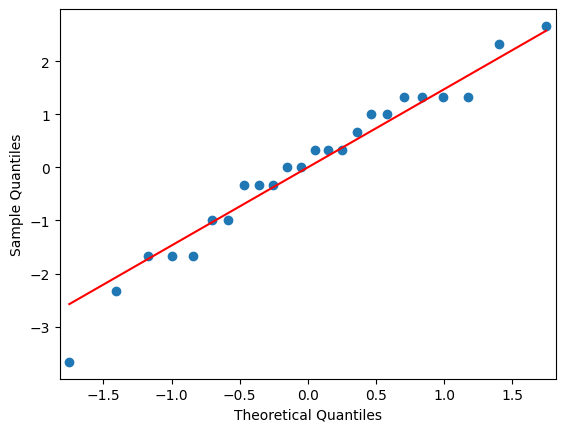

In [59]:
import statsmodels.api as sm

# Extract residuals from the fitted model
res = model_3.resid       # Residuals represent the difference between observed and predicted values

# Create a Q-Q plot to check for normality of residuals
fig = sm.qqplot(
    res,                  # Residuals to be plotted
    line='s'              # Add a reference line ('s' for standardized) to assess normality
)                         # Generates a Q-Q plot comparing residuals to a theoretical normal distribution

#### Purpose of Q-Q Plot:

A Q-Q plot compares the quantiles of the residuals (sample quantiles) to the quantiles of a theoretical normal distribution (theoretical quantiles). It helps assess whether the residuals follow a normal distribution, which is a key assumption in many statistical models like ANOVA or regression.

#### Interpretation of the Plot:

The red line represents the theoretical normal distribution.
The blue dots represent the residuals from our model.
If the residuals follow a normal distribution, the points should lie approximately along the red line.
    
#### What You Are Seeing:

The points align well with the red line, indicating that the residuals are close to normally distributed.
There is slight deviation in the tails (extreme values) of the distribution, but this does not appear severe enough to raise concerns about the assumption of normality.

#### Conclusion:

The residuals of our model appear to follow a normal distribution reasonably well.
This suggests that the normality assumption is likely satisfied for our model, making the results from our analysis (e.g., ANOVA) valid.

### Randomized Block Designs and Repeated Measures

In [62]:
rat = pd.DataFrame({'rat': np.repeat([1, 2, 3, 4, 5, 6], 3),
                  'trial': np.tile([1, 2, 3], 6),
                   'time': [10.0, 8.2, 5.3, 12.1, 11.2, 9.1, 9.2, 8.1, 4.6, 11.6, 10.5, 8.1, 8.3, 7.6, 5.5, 10.5, 9.5, 8.1]})
rat.head()

,rat,trial,time
0,1,1,10.0
1,1,2,8.2
2,1,3,5.3
3,2,1,12.1
4,2,2,11.2


In [63]:
from statsmodels.stats.anova import AnovaRM 

# Perform a repeated measures ANOVA
print(
    AnovaRM(
        data=rat,                   # Dataset containing the data
        depvar='time',              # Dependent variable ('time' to analyze the response variable)
        subject='rat',              # Subject identifier column ('rat' for repeated measures)
        within=['trial']            # Within-subject factor(s) ('trial' is the repeated measure factor)
    ).fit()                         # Fit the model and return the ANOVA results
)

               Anova
      F Value Num DF  Den DF Pr > F
-----------------------------------
trial 72.6196 2.0000 10.0000 0.0000



    P-value (0.0000) < alpha (0.05); H1: we have inferential evidence that the mean on the response variable is not the same across trials.

# Nonparametric Alternatives

### Mann-Whitney U Test
When the assumptions of the independent samples t-test are violated or unverifiable,
the Mann-Whitney U test becomes a viable alternative nonpar option. Recall that
the null hypothesis in the independent samples t-test was that both population means
were equal. That is, the null hypothesis was:

    H0: µ1 = µ2

In [67]:
data = {'grade':[0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
    'studytime': [30, 25, 59, 42, 31, 140, 90, 95, 170, 120]}

df4 = pd.DataFrame(data)
df4

,grade,studytime
0,0,30
1,0,25
2,0,59
3,0,42
4,0,31
5,1,140
6,1,90
7,1,95
8,1,170
9,1,120


In [68]:
grade = df4['grade']
studytime = df4['studytime']

In [69]:
from scipy.stats import mannwhitneyu

# Sample1
sample1=[30, 25, 59, 42, 31]

# Sample2
sample2=[140, 90, 95, 170, 120]

# Apply Test
stat, p = mannwhitneyu(sample1, sample2, alternative='two-sided')
print("U-statistic:",stat)
print()
print("p-values:",p)
print()

# 0.01 or 1% is significance level or alpha.

if p  < 0.01:    
    print("H1: We can Reject Null Hypothesis. Mu1!=Mu2")
else:
    print("H0: We can not Reject Null Hypothesis. Mu1 == Mu2")

U-statistic: 0.0

p-values: 0.007936507936507936

H1: We can Reject Null Hypothesis. Mu1!=Mu2


We see that the result is statistically significant with a p-value equal to approximately
0.008. Hence, we can reject the null and have evidence to suggest that the two groups
were not drawn from the same population. The Mann-Whitney test is quick, easy, and
immediately gives you an idea as to whether something might be “going on” with your
data without having to satisfy parametric assumptions.

### Kruskal-Wallis Test as a Nonparametric Alternative to ANOVA

Recall that when we have several means to compare, conducting numerous independent samples t-tests unduly inflates the type I error rate over the family of comparisons. The solution in such a case is the one-way ANOVA. When assumptions such as normality and equal variances are violated, a plausible nonpar alternative is the KruskalWallis (K-W) test to evaluate the null that all samples were drawn from the same population.

    H0: mu1 = mu2 = m3 = mu4

In [73]:
from scipy.stats import kruskal

x = [70, 67, 65, 75, 76, 73]
y = [69, 68, 70, 76, 77, 75]
z = [85, 86, 85, 76, 75, 73]
w = [95, 94, 89, 94, 93, 91]

# Kruskal-Wallis test
hstat, p = kruskal(x, y, z, w)

print('stat = {0:.4f}, p-value= {1:.4f}'.format(hstat, p))

stat = 16.2665, p-value= 0.0010


    p-value (0.001) < alpha (0.05); H1: We can reject null hypothesis. 

We reject the null that the samples were drawn from the same population and infer that they were not. However, as
with ANOVA, simply because we have rejected the overall null, we do not yet know
where the differences may lie. To know this, we need to conduct post-hoc tests to
determine which populations are pairwise different from which others. One easy way
to do this is to simply run the K-W test on pairwise groups and issue a correction on
alpha for each comparison. For example, we will see if there is a difference between
groups x and y:

In [75]:
# Kruskal-Wallis test
hstat, p = kruskal(x, y)

print('stat = {0:.4f}, p-value= {1:.4f}'.format(hstat, p))

stat = 0.5247, p-value= 0.4688


    p-value (0.4688) > alpha (0.05); H0: mux = muy.

We can see that the test comes out to be non-statistically significant (p = 0.4688), suggesting that a difference does not exist between these two groups. We could do the
same thing for the other groups as well to determine where differences may lie, testing
each comparison at a smaller significance level to keep the overall family-wise error
rate low. An even more effective strategy would be to use the **Nemenyi test** as a posthoc test.

In [78]:
import scikit_posthocs as sp

v = [[70, 67, 65, 75, 76, 73], 
     [69, 68, 70, 76, 77, 75], 
     [85, 86, 85, 76, 75, 73], 
     [95, 94, 89, 94, 93, 91]]

sp.posthoc_nemenyi(v)

,1,2,3,4
1,1.000000,0.974034,0.387602,0.003552
2,0.974034,1.000000,0.657109,0.016002
3,0.387602,0.657109,1.000000,0.286205
4,0.003552,0.016002,0.286205,1.000000


    We can see that the test reports significant differences between groups 1 and 4 (p = 0.003552), as well as 2 and 4 (p = 0.016002).

In [80]:
nemenyi = sp.posthoc_nemenyi(v)
nemenyi

,1,2,3,4
1,1.000000,0.974034,0.387602,0.003552
2,0.974034,1.000000,0.657109,0.016002
3,0.387602,0.657109,1.000000,0.286205
4,0.003552,0.016002,0.286205,1.000000


In [81]:
pvalue14 = nemenyi[1][4]
pvalue14

0.0035515820602331403

## Statistical Test Decision Map

### Step 1: Identify Your Objective
- **Compare Means**  
  Proceed to Step 2.
- **Test for Correlation/Association**  
  Proceed to Step 3.
- **Compare Variances**  
  Proceed to Step 4.
- **Check for Normality**  
  Proceed to Step 5.

---

### Step 2: Comparing Means
1. **Number of Groups**:
   - **Two Groups**:  
     - **Independent Samples**:  
       - Check for normality:
         - **Normal Distribution**: Use **t-test**.
         - **Non-Normal Distribution**: Use **Mann-Whitney U test**.
       - Check for equal variances:
         - **Equal Variances**: Use **t-test (pooled)**.
         - **Unequal Variances**: Use **Welch’s t-test**.
     - **Dependent (Paired) Samples**:  
       - **Normal Distribution**: Use **paired t-test**.
       - **Non-Normal Distribution**: Use **Wilcoxon Signed-Rank test**.

   - **More than Two Groups**:  
     - **Independent Samples**:  
       - **Normal Distribution**:
         - Check variances:
           - **Equal Variances**: Use **ANOVA**.
           - **Unequal Variances**: Use **Welch’s ANOVA**.
       - **Non-Normal Distribution**: Use **Kruskal-Wallis test**.
     - **Dependent Samples**:  
       - **Normal Distribution**: Use **Repeated Measures ANOVA**.
       - **Non-Normal Distribution**: Use **Friedman test**.

---

### Step 3: Correlation/Association
1. **Both Variables are Continuous**:
   - **Normal Distribution**: Use **Pearson’s correlation**.
   - **Non-Normal Distribution**: Use **Spearman’s rho** or **Kendall’s tau**.

2. **One Variable is Categorical**:
   - Use **Point-Biserial correlation** (if continuous variable is normally distributed).
   - Use **Spearman’s rho** (otherwise).

3. **Both Variables are Categorical**:
   - Use **Chi-Square test for independence** or **Fisher’s exact test** (if sample size is small).

---

### Step 4: Comparing Variances
- **Two Groups**:  
  - Use **F-test** (for normal distributions).
  - Use **Levene’s test** or **Bartlett’s test** (for robust comparisons).

- **More than Two Groups**:  
  - Use **Levene’s test** (robust to non-normality).
  - Use **Bartlett’s test** (for normal distributions).

---

### Step 5: Checking Normality
- Use **Shapiro-Wilk test** for small to medium sample sizes (3–2000).
- Use **Anderson-Darling test** for larger datasets.
- Visualize distributions with **histograms**, **Q-Q plots**, or **density plots**.

---

### Summary Table of Common Tests

| **Objective**               | **Test**                                       | **Conditions**                                  |
|------------------------------|-----------------------------------------------|------------------------------------------------|
| Compare two means            | t-test / Welch's t-test / Mann-Whitney U      | Normality, Variances, Independent/Dependent    |
| Compare more than two means  | ANOVA / Welch’s ANOVA / Kruskal-Wallis        | Normality, Variances, Independent/Dependent    |
| Test correlation             | Pearson / Spearman / Kendall                 | Normality                                      |
| Test independence (categorical) | Chi-Square / Fisher’s exact test            | Sample size                                    |
| Test variance                | F-test / Levene’s / Bartlett’s               | Normality, Variances                           |
| Test normality               | Shapiro-Wilk / Anderson-Darling              | Sample size                                    |

---

### Additional Notes
- Always visualize your data first (e.g., boxplots, histograms, scatter plots).  
- Use appropriate transformations (e.g., log, square root) if assumptions are violated.  
- When in doubt about assumptions, choose non-parametric tests.
